In [12]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
df = pd.read_csv("data/processed_dataset1.csv")

In [14]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Time,Recorded_times,Categorized_times,Categorized_trasaction_purpose
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6/21/2020 12:14,12:14:25,3,3
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6/21/2020 12:14,12:14:33,3,3
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6/21/2020 12:14,12:14:53,3,3
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,6/21/2020 12:15,12:15:15,3,4
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,6/21/2020 12:15,12:15:17,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,12/31/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,2/13/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,12/31/2020 23:59,23:59:07,4,3
555715,555715,12/31/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,12/27/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,12/31/2020 23:59,23:59:09,4,1
555716,555716,12/31/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,11/29/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,12/31/2020 23:59,23:59:15,4,1
555717,555717,12/31/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,12/15/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,12/31/2020 23:59,23:59:24,4,2


In [15]:
# Load data
X = df[["amt","Categorized_times", "Categorized_trasaction_purpose"]]

# Extracting Target / Class Labels
y = df['is_fraud']

In [16]:
from sklearn.model_selection import train_test_split
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42) 

In [17]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

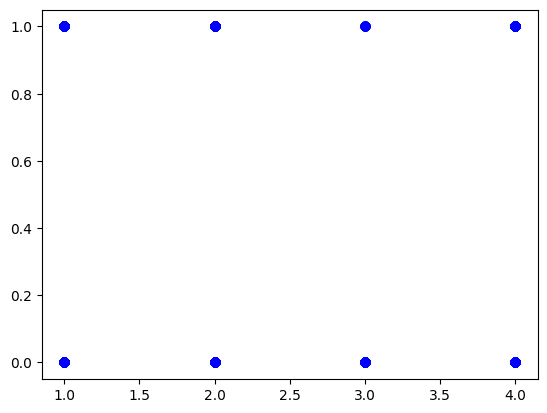

In [23]:
x = df["Categorized_trasaction_purpose"]
y = df["is_fraud"]

x=x.to_numpy().reshape(-1,1)
y=y.to_numpy()

θ_o=clf.intercept_
θ_1=clf.coef_

#draw logisitc curve using seaborn library
ax=sns.regplot(x="Categorized_trasaction_purpose", y="is_fraud",  data=df, logistic=True, ci=None, 
            scatter_kws={'color': 'blue'}, line_kws={'color': '#df355a'})

plt.xlabel("Categorized_trasaction_purpose", fontsize=12)
plt.ylabel("is_fraud", fontsize=12)

print(θ_o)
print(θ_1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[387378    120]
 [  1505      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387498
           1       0.00      0.00      0.00      1505

    accuracy                           1.00    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      1.00      0.99    389003

0.9958226543240026


In [ ]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[166023     53]
 [   640      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

0.9958432304038005
